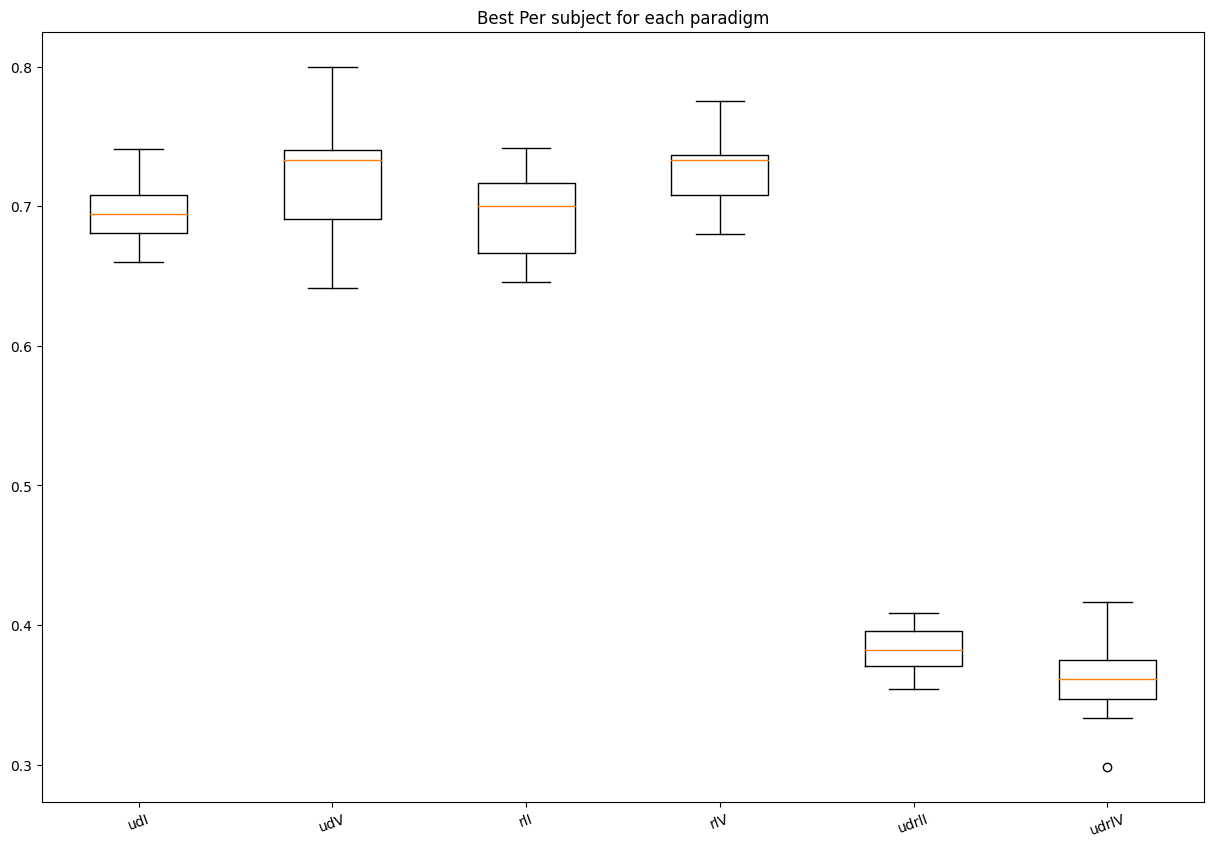

In [95]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

genSavePath = f"{os.getcwd()}/topFeaturesResults/"

paradigms = ["ud", "rl", "udrl"]
types = ["I","V"]
comboNr = [1,2,3,4]
results = []
for para in paradigms:
    for type in types:
        for nr in comboNr:
            path = glob.glob(genSavePath + f"top{nr}{para}{type}*")
            if len(path) > 0:
                topFeatures = path
        if len(topFeatures)>0:
            results.append(np.load(topFeatures[0], allow_pickle=True))
# print(len(results))
results = np.array(results,dtype=object)
# print(results.shape) # Paradigm, subject, top2, [acc, sub, name, kern, C]
# print(results[0])
# print(results[0,0])
# print(results[1])
results = results[:,:,0,:]
# print(results[0,1,1])
# print(results[0,1])
bestPerSub = np.zeros([results.shape[0], results.shape[1]])
for ind, para in enumerate(results):
    for subj in para:
        # print(subj[0])
        # print(int(subj[1]))
        bestPerSub[ind, int(subj[1])-1] = subj[0]
bestPerSub = np.array(bestPerSub)
plt.figure(figsize=[15,10])
plt.boxplot(bestPerSub.T)
combos = []
for para in paradigms:
    for type in types:
        combos.append(f"{para}{type}")
#plt.legend(combos)
plt.xticks(np.arange(len(combos))+1, combos,rotation=20)
plt.title("Best Per subject for each paradigm")
print("")

In [96]:

genSavePath = f"{os.getcwd()}/topFeaturesResults/"

paradigms = ["ud", "rl", "udrl"]
types = ["I","V"]
comboNr = [1,2,3,4]
results = []
for para in paradigms:
    for type in types:
        for nr in comboNr:
            path = glob.glob(genSavePath + f"top{nr}{para}{type}*")
            if len(path) > 0:
                topFeatures = path
        if len(topFeatures)>0:
            results.append(np.load(topFeatures[0], allow_pickle=True))
# print(len(results))
results = np.array(results,dtype=object)
# print(results.shape) # Paradigm, subject, top2, [acc, sub, name, kern, C]
# print(results[0])
# print(results[0,0])
# print(results[1])
results = results[:,:,0,:]
# print(results[0,1,1])
# print(results[0,1])
bestPerSub = np.zeros([results.shape[0], results.shape[1]])
for ind, para in enumerate(results):
    for subj in para:
        # print(subj[0])
        # print(int(subj[1]))
        bestPerSub[ind, int(subj[1])-1] = subj[0]
bestPerSub = np.array(bestPerSub)
combos = []
for para in paradigms:
    for type in types:
        combos.append(f"{para}{type}")

In [97]:
subNames = []
for x in range(1,10):
    subNames.append(f"Sub: {x}")
subNames

['Sub: 1',
 'Sub: 2',
 'Sub: 3',
 'Sub: 4',
 'Sub: 5',
 'Sub: 6',
 'Sub: 7',
 'Sub: 8',
 'Sub: 9']

In [98]:

print(results.shape)
print(np.array(combos).shape)
newRes = []
for para, comb in zip(results, combos):
    for sub in para:
        newRes.append(np.concatenate([sub, [comb]]))
        #print(np.concatenate([sub,["hi"]]))
print(np.array(newRes).shape)
print(np.array(newRes)[2])

    # np.hstack()
    # print(para[:])
    # print(comb)
    # np.hstack([para, comb], axis=1)

(6, 9, 5)
(6,)
(54, 6)
['0.7083333333333334' '1'
 'fftData_BC_ifftlateTimeSortedSep13_&_hilbertData_BC_CVlateTimeSortedSep13_&_stftData_BC_CVlateTimeSortedSep13'
 'sigmoid' '2.5' 'udI']


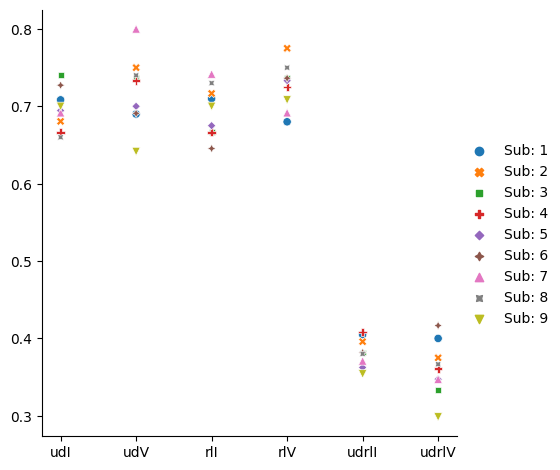

In [115]:
df = pd.DataFrame(bestPerSub.T, index=subNames, columns=combos)
df2 = pd.DataFrame(bestPerSub, index=combos, columns=subNames)
df3 = pd.DataFrame(bestPerSub.T)

df4 = pd.DataFrame(newRes, columns=["Accuracy", "Subjects", "Feature", "Kernel", "C", "Paradigm"] )
# sns.relplot(data=df4, x="Paradigm", y="Subjects")
# sns.relplot(data=df2)
# sns.barplot(data=df4, x="Paradigm", y="Accuracy")
sns.swarmplot(data=df2)
# sns.relplot(df4)
# sns.relplot(data=df3, row_order=subjects)

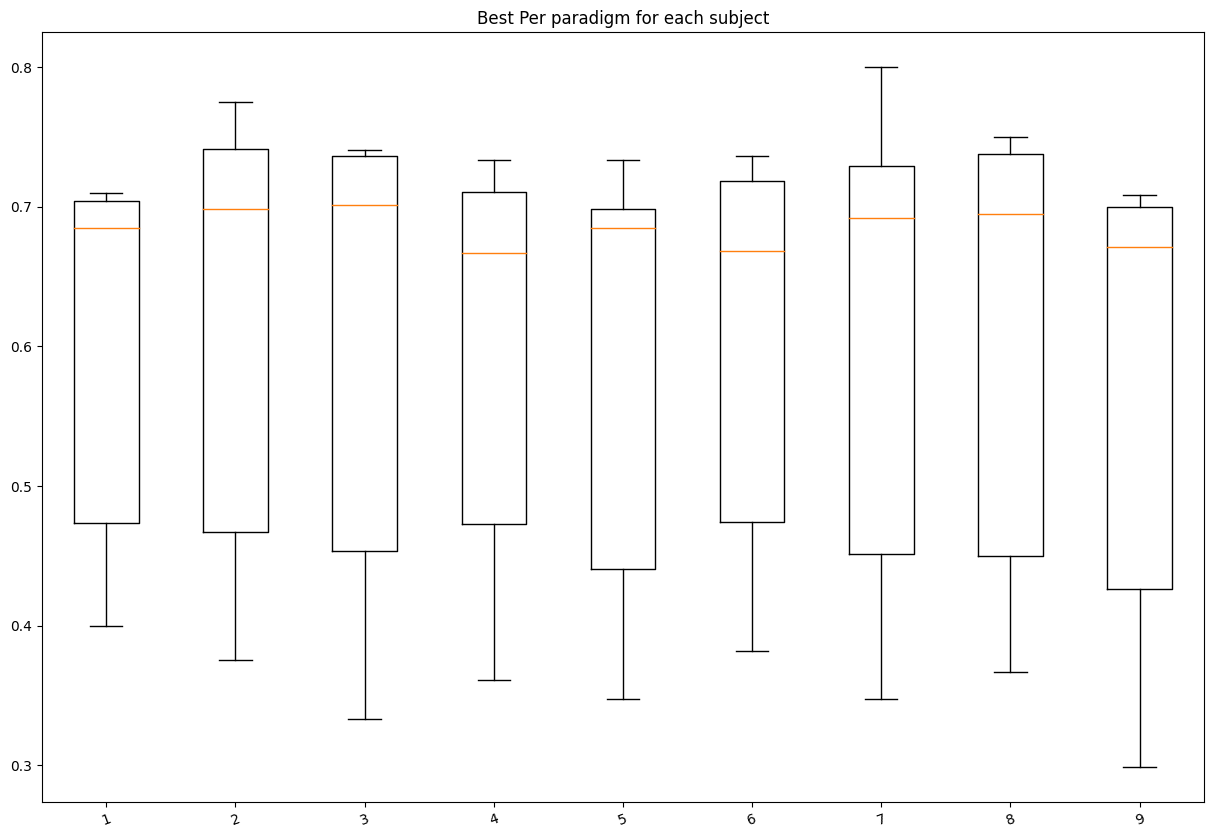

In [100]:
plt.figure(figsize=[15,10])
plt.boxplot(bestPerSub)
combos = []
for para in paradigms:
    for type in types:
        combos.append(f"{para}{type}")
#plt.legend(combos)
subjects = [1,2,3,4,5,6,7,8,9]
plt.xticks(np.arange(len(subjects))+1, subjects,rotation=20)
plt.title("Best Per paradigm for each subject")
print("")

['udI', 'rlI', 'udrlI']
['udV', 'rlV', 'udrlV']
['udI', 'udV', 'rlI', 'rlV', 'udrlI', 'udrlV']




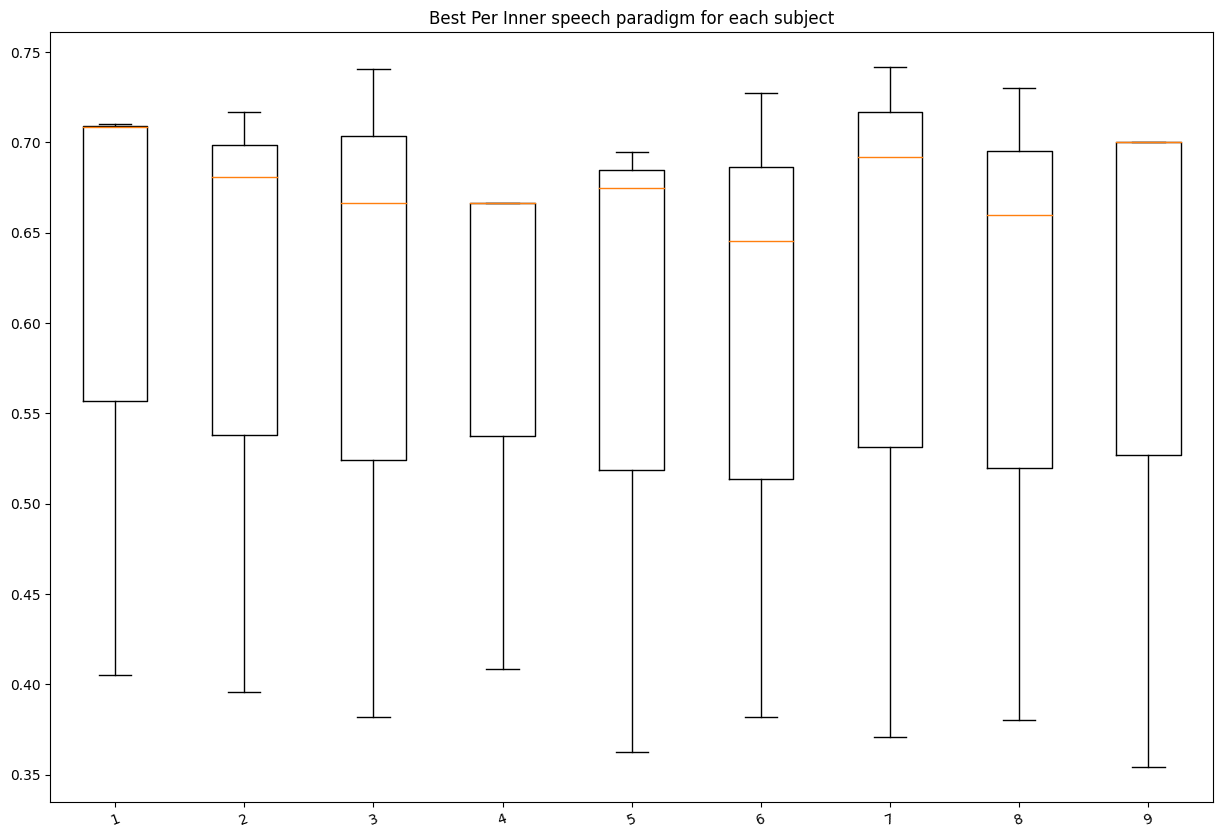

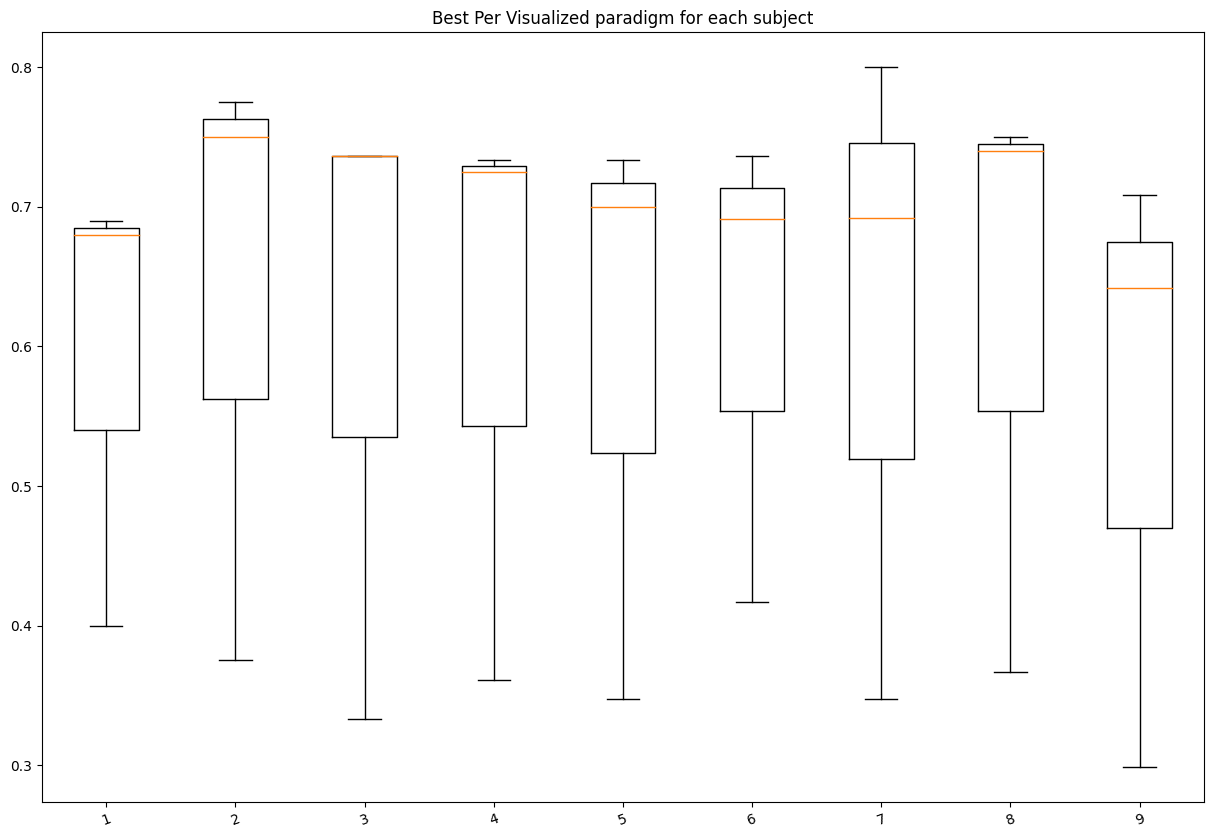

In [101]:
onlyInner = bestPerSub[0::2, :]
onlyVis = bestPerSub[1::2, :]

plt.figure(figsize=[15,10])
plt.boxplot(onlyInner)
combos = []
for para in paradigms:
    for type in types:
        combos.append(f"{para}{type}")
print(combos[0::2])
print(combos[1::2])
print(combos)
#plt.legend(combos)
subjects = [1,2,3,4,5,6,7,8,9]
plt.xticks(np.arange(len(subjects))+1, subjects,rotation=20)
plt.title("Best Per Inner speech paradigm for each subject")
print("")
plt.figure(figsize=[15,10])
plt.boxplot(onlyVis)
combos = []
for para in paradigms:
    for type in types[0]:
        combos.append(f"{para}{type}")
#plt.legend(combos)
subjects = [1,2,3,4,5,6,7,8,9]
plt.xticks(np.arange(len(subjects))+1, subjects,rotation=20)
plt.title("Best Per Visualized paradigm for each subject")
print("")

In [102]:
paradigms = ["ud", "rl", "udrl"]
types = ["I","V"]
combos = []
for para in paradigms:
    for type in types:
        combos.append(f"{para}{type}")
combos

['udI', 'udV', 'rlI', 'rlV', 'udrlI', 'udrlV']

In [103]:
# bestPerSub = np.zeros([results.shape[0], results.shape[1]])
# for paraNr, para in enumerate(results):
#     print(paraNr)
#     for subj in para:
#         print(paraNr)
#         # for x in subj[0]:
#         # bestPerSub[paraNr, int(subj[1])] = subj[0] 

# print(results.shape)
# plt.figure(figsize=[15,10])
# plt.boxplot(bestPerSub)
# # each row is a subject. Each column is a paradigm. Each value is best result for that subject/paradigm
# # udInner, udVis, rlInner, rlVis, udrlInner, udrlVis
# bestResultsPerParadigm = np.array([[0.98,   1,  0.96,   0.98,   0.75,   0.7],
#                                    [1,  1,  1,  1,  0.79,   0.76],
#                                    [0.97,   0.96,   0.98,   0.97,   0.78,   0.66], 
#                                    [1,  1,  1,  0.98,   0.79,   0.78], 
#                                    [1,  1,  1,  1,  0.8,    0.81], 
#                                    [0.94,   0.96,   0.96,  0.97,    0.73,   0.75], 
#                                    [1,  1,  0.98,   1,  0.76,   0.76], 
#                                    [1,  0.98,   1,  1,  0.75,   0.75],
#                                    [1,  1,  0.98,   1,  0.76,   0.74]])

# # First boxplot: first dim should be best results for all subjects for one "paradigm/word combo", second and onwards same but new paradigm
# # Second boxplot: Each dim should be a separate feature, containing best result for each subject. Do one plot each per paradigm
# # Third boxplot: Each dim should be best average result over all subjects for one paradigm/word combo. .... next dims, second best average mby not
# # This third one is not really boxplot. More like, Like "tower" plot
# # Do one boxplot per each paradigm. Start with these!
# # Then, better explain all the steps. 
# plt.figure(figsize=[15,10])
# plt.boxplot(bestResultsPerParadigm)
# plt.legend(["udInner", "udVis", "rlInner"," rlVis", "udrlInner", "udrlVis"])
# plt.figure(figsize=[22,10])
# plt.boxplot(bestResultsPerParadigm.T)
# plt.legend([f"sub ject {1}", f"sub ject {2}", f"sub ject {3}",f"sub ject {4}", f"sub ject {5}", f"sub ject {6}"f"sub ject {7}", f"sub ject {8}", f"sub ject {9}"])


# print("")

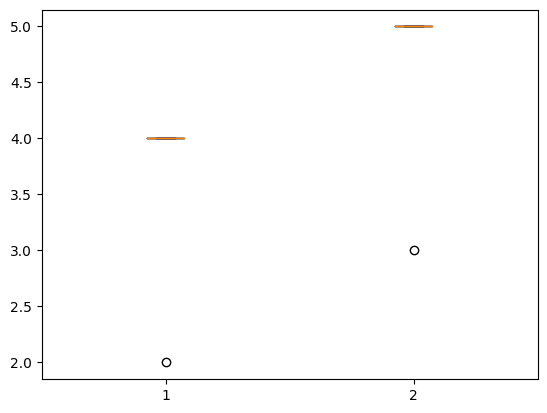

In [104]:
# each row is a subject, each column is a feature. Each value in each one is best result for one subject for that feature

upDownLeftRightInnerBestResultsPerFeature = np.array([
                                   [2,3],
                                   [4,5],
                                   [4,5], 
                                   [4,5], 
                                   [4,5], 
                                   [4,5], 
                                   [4,5], 
                                   [4,5],
                                   [4,5]])

plt.figure()
plt.boxplot(upDownLeftRightInnerBestResultsPerFeature)
print("")


# Top ten highest accuracies, up down inner,  one feature. Here though. I need to go through
# each feature in makeTables

# Accuracy 0.94 : subject 8, feature:-dataFFTCV-BC, kernelsigmoid, C:10

# Accuracy 0.94 : subject 5, feature:-dataWCV-BC, kernelrbf, C:10

# Accuracy 0.91 : subject 1, feature:-dataFFTCV-BC, kernelrbf, C:0.5

# Accuracy 0.9 : subject 4, feature:-dataFFTCV-BC, kernellinear, C:2.5

# Accuracy 0.87 : subject 7, feature:-dataFFTCV-BC, kernelrbf, C:1.2

# Accuracy 0.87 : subject 2, feature:-dataWCV-BC, kernelsigmoid, C:2.5

# Accuracy 0.84 : subject 9, feature:-dataWCV-BC, kernelrbf, C:10

# Accuracy 0.84 : subject 6, feature:-dataWCV-BC, kernelrbf, C:0.5

# Accuracy 0.77 : subject 3, feature:-dataFFTCV-BC, kernelrbf, C:10

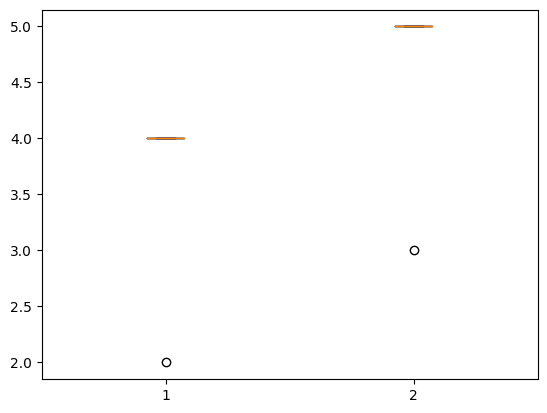

In [105]:

# Accuracy 0.84 : subject 9, feature:-dataWCV-BC, kernelrbf, C:10

# Accuracy 0.84 : subject 6, feature:-dataWCV-BC, kernelrbf, C:0.5

# Accuracy 0.99 : subject 8, feature:dataHRCV-BCcn3-dataWCV-BC--dataFFTCV-BC, kernelrbf, C:0.5

# Accuracy 0.99 : subject 5, feature:dataHRCV-BCcn3--dataWCV-BC, kernelrbf, C:10

# Accuracy 0.98 : subject 7, feature:welchDatacn3BC-dataWCV-BC--dataFFTCV-BC, kernellinear, C:2.5

# Accuracy 0.97 : subject 4, feature:welchDatacn3BC-dataHRCV-BC--dataWCV-BC, kernellinear, C:2.5

# Accuracy 0.92 : subject 1, feature:dataHRCV-BC-dataWCV-BC--dataFFTCV-BC, kernelrbf, C:2.5

# Accuracy 0.91 : subject 2, feature:welchDatacn3BC-dataWCV-BC--dataFFTCV-BC, kernelrbf, C:5

# Accuracy 0.79 : subject 3, feature:dataWCV-BC--dataFFTCV-BC, kernelrbf, C:10

# each row is a subject, each column is a feature. Each value in each one is best result for one subject for that feature
upDownInnerBestResultsPerFeature = np.array([
                                   [2,3],
                                   [4,5],
                                   [4,5], 
                                   [4,5], 
                                   [4,5], 
                                   [4,5], 
                                   [4,5], 
                                   [4,5],
                                   [4,5]])

plt.figure()
plt.boxplot(upDownInnerBestResultsPerFeature)
print("")

In [106]:
# Average on up down inner, best
# welchDatacn3BC-dataWCV-BC--dataFFTCV-BC
# rbf
# 0.876337822671156